# Data Preparation Notebook

This notebook performs data preparation and exploratory analysis on the dialysis facilities dataset. It includes data loading, merging, summary statistics, and visualization steps.

# I. Environment Setup

In [26]:
import pandas as pd
import scripts as func
import numpy as np

# II. DFC AND CHAPS Datasets

## 1. DATA Descritpion

## 2. Load Datasets
This section loads raw data from various CSV files.

### 2.1 Load DFC Facility Data

In [3]:
# Load DFC Facility Data
path_dfc = 'DATA\DIALYSIS_FASCILITIES\DFC_FACILITY.csv'
df_dfc_raw = pd.read_csv(path_dfc)
df_dfc_raw_CA = df_dfc_raw[df_dfc_raw['State'] == 'CA']
dfc_columns = ['CMS Certification Number (CCN)',
              'Facility Name',
              'County/Parish',
              '# of Dialysis Stations',
              'Profit or Non-Profit',
              'Chain Owned',
              'Chain Organization']

df_dfc = df_dfc_raw_CA[dfc_columns]


### 2.2 Load ICH CAHPS Facility Data

In [4]:
# Load ICH CAHPS Facility Data
# import and filter surevy data
path_chaps = 'DATA\DIALYSIS_FASCILITIES\ICH_CAHPS_FACILITY.csv'
df_chaps_raw = pd.read_csv(path_chaps)

# Filter the data to only include California
df_chaps_RAW_CA = df_chaps_raw[df_chaps_raw['State'] == 'CA']

chaps_columns = ["CMS Certification Number (CCN)",
                "Total number of completed interviews from the Fall and Spring Surveys",
                "Survey response rate",
                "Star rating of the dialysis facility",
                "ICH CAHPS Survey of patients' experiences star rating",
                "Linearized score of nephrologists' communication and caring",
                "Linearized score of quality of dialysis center care and operations",
                "Linearized score of providing information to patients",
                "Linearized score of rating of the nephrologist",
                "Linearized score of rating of the dialysis center staff",
                "Linearized score of rating of the dialysis facility",]

df_chaps = df_chaps_RAW_CA[chaps_columns]

# Create a main dataframe
main_df = pd.DataFrame(df_dfc['CMS Certification Number (CCN)'])


## 3. Data Merging
This section merges the loaded datasets based on common columns.

In [5]:
# Merge DFC and CHAPS data
# update the main dataframe with dfc and chaps data
df_fasc = df_dfc.merge(df_chaps, on='CMS Certification Number (CCN)', how='left')

data_dict = {
    'CMS Certification Number (CCN)': 'CCN',
    'Facility Name': 'FAC_NAME',
    'County/Parish': 'COUNTY',
    '# of Dialysis Stations': 'STATIONS',
    'Profit or Non-Profit': 'PROF_NP',
    'Chain Owned': 'CHAIN_OWN',
    'Chain Organization': 'CHAIN_ORG',
    'Linearized score of nephrologists\' communication and caring': 'COMM_SCR',
    'Linearized score of quality of dialysis center care and operations': 'QUALITY_SCR',
    'Linearized score of providing information to patients': 'INFO_SCR',
    'Linearized score of rating of the nephrologist': 'PHYS_SCR',
    'Linearized score of rating of the dialysis center staff': 'STAFF_SCR',
    'Linearized score of rating of the dialysis facility': 'FAC_SCR',
    'Star rating of the dialysis facility': 'FAC_STAR',
    'Total number of completed interviews from the Fall and Spring Surveys': 'SURVEY_COUNT',
    'ICH CAHPS Survey of patients\' experiences star rating': 'XP_STAR',
    'Survey response rate': 'SURVEY_RATE',

}

df_fasc.rename(columns=data_dict, inplace=True)

df_fasc.head()

CCN                                         FAC_NAME          COUNTY  \
0  52305             SANTA CLARA VALLEY RENAL CARE CENTER     Santa Clara   
1  52311                 St. Joseph Hospital Renal Center          Orange   
2  52321                Childrens Hospital of Los Angeles     Los Angeles   
3  52323  Kaiser Foundation Hospital Medical Ctr.- Sunset     Los Angeles   
4  52334                Arrowhead Regional Medical Center  San Bernardino   

   STATIONS     PROF_NP CHAIN_OWN          CHAIN_ORG  SURVEY_COUNT  \
0        25  Non-profit        No        Independent          47.0   
1        39  Non-profit        No        Independent           NaN   
2        10  Non-profit        No        Independent           NaN   
3        30  Non-profit       Yes  Kaiser Permanente          52.0   
4         8  Non-profit        No        Independent           NaN   

   SURVEY_RATE  FAC_STAR  XP_STAR  COMM_SCR  QUALITY_SCR  INFO_SCR  PHYS_SCR  \
0         19.0       3.0      4.0      85.0         85.0      81.0      88.0   
1          NaN       NaN      NaN       NaN          NaN       NaN       NaN   
2          NaN       NaN      NaN       NaN          NaN       NaN       NaN   
3         25.0       4.0      4.0      76.0         82.0      84.0      82.0   
4          NaN       NaN      NaN       NaN          NaN       NaN       NaN   

   STAFF_SCR  FAC_SCR  
0       88.0     89.0  
1        NaN      NaN  
2        NaN      NaN  
3       88.0     91.0  
4        NaN      NaN

## 4. Basic Data Exploration
This section provides a brief overview of the merged dataset, including data types, summary statistics, and missing values.

In [6]:
# Display dataset information
df_fasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CCN           736 non-null    int64  
 1   FAC_NAME      736 non-null    object 
 2   COUNTY        736 non-null    object 
 3   STATIONS      736 non-null    int64  
 4   PROF_NP       736 non-null    object 
 5   CHAIN_OWN     736 non-null    object 
 6   CHAIN_ORG     736 non-null    object 
 7   SURVEY_COUNT  419 non-null    float64
 8   SURVEY_RATE   419 non-null    float64
 9   FAC_STAR      419 non-null    float64
 10  XP_STAR       419 non-null    float64
 11  COMM_SCR      419 non-null    float64
 12  QUALITY_SCR   419 non-null    float64
 13  INFO_SCR      419 non-null    float64
 14  PHYS_SCR      419 non-null    float64
 15  STAFF_SCR     419 non-null    float64
 16  FAC_SCR       419 non-null    float64
dtypes: float64(10), int64(2), object(5)
memory usage: 97.9+ KB


In [7]:
# Summary statistics for numerical columns
# Summary statistics for numerical columns
df_fasc.describe().T



count           mean            std      min       25%  \
CCN           736.0  357040.985054  268315.314779  52305.0  52757.75   
STATIONS      736.0      20.627717       9.610651      0.0     16.00   
SURVEY_COUNT  419.0      47.295943      14.244390     30.0     37.00   
SURVEY_RATE   419.0      25.665871       4.726294     13.0     22.00   
FAC_STAR      419.0       3.427208       0.913128      1.0      3.00   
XP_STAR       419.0       3.522673       0.850745      1.0      3.00   
COMM_SCR      419.0      80.653938       5.928768     61.0     77.00   
QUALITY_SCR   419.0      81.226730       4.250376     68.0     78.00   
INFO_SCR      419.0      78.880668       5.256127     58.0     76.00   
PHYS_SCR      419.0      84.257757       4.900972     65.0     81.00   
STAFF_SCR     419.0      87.307876       3.636367     74.0     85.00   
FAC_SCR       419.0      88.601432       3.764744     74.0     86.50   

                   50%        75%       max  
CCN           552561.5  552769.25  752592.0  
STATIONS          22.0      25.00      76.0  
SURVEY_COUNT      44.0      52.00     117.0  
SURVEY_RATE       25.0      29.00      43.0  
FAC_STAR           3.0       4.00       5.0  
XP_STAR            4.0       4.00       5.0  
COMM_SCR          81.0      85.00      93.0  
QUALITY_SCR       81.0      84.00      92.0  
INFO_SCR          79.0      83.00      91.0  
PHYS_SCR          85.0      88.00      94.0  
STAFF_SCR         88.0      90.00      95.0  
FAC_SCR           89.0      91.00      97.0

In [8]:
# Value counts for 'CHAIN_ORG' column

# Value counts for categorical columns
df_fasc['CHAIN_ORG'].value_counts()


CHAIN_ORG
DaVita                         352
Fresenius Medical Care         146
Independent                     86
Satellite Healthcare            55
US Renal Care, Inc.             47
Kaiser Permanente               14
Satellite Dialysis              11
Dialysis Clinic, Inc.            9
American Renal Associates        9
Other                            6
Innovative Dialysis Systems      1
Name: count, dtype: int64

CCN               0
FAC_NAME          0
COUNTY            0
STATIONS          0
PROF_NP           0
CHAIN_OWN         0
CHAIN_ORG         0
SURVEY_COUNT    317
SURVEY_RATE     317
FAC_STAR        317
XP_STAR         317
COMM_SCR        317
QUALITY_SCR     317
INFO_SCR        317
PHYS_SCR        317
STAFF_SCR       317
FAC_SCR         317
dtype: int64


<Axes: >

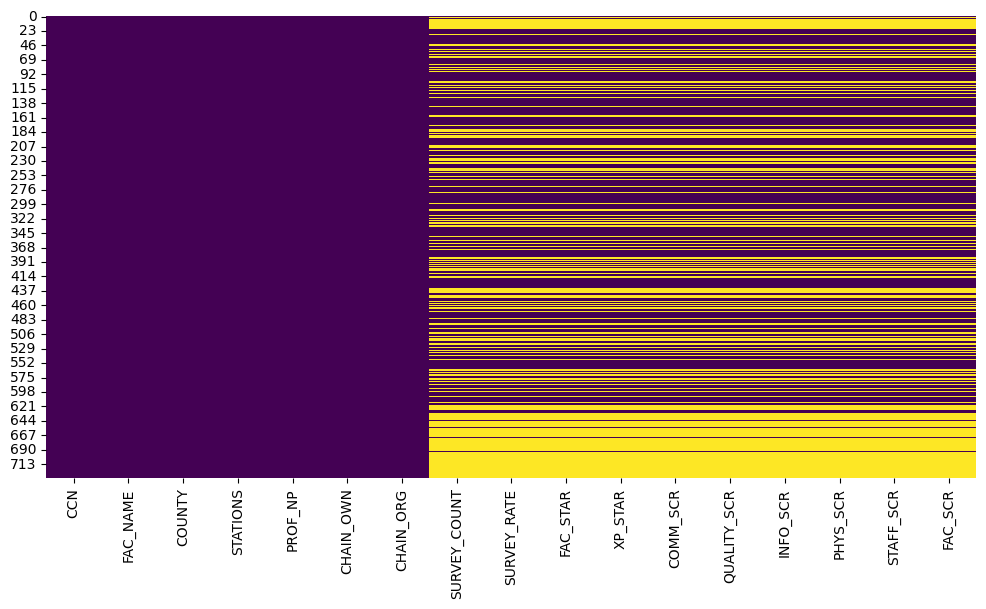

In [9]:
# Count missing values in each column
# Count missing values in each column
missing_counts = df_fasc.isnull().sum()
print(missing_counts)
# Visualizing missing data using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(df_fasc.isnull(), cbar=False, cmap='viridis')


In [11]:
# List all columns in the dataset
df_fasc.columns

Index(['CCN', 'FAC_NAME', 'COUNTY', 'STATIONS', 'PROF_NP', 'CHAIN_OWN',
       'CHAIN_ORG', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR',
       'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR',
       'FAC_SCR'],
      dtype='object')

## 5. Data Visualization
This section includes visualizations to explore data distributions and relationships between variables.

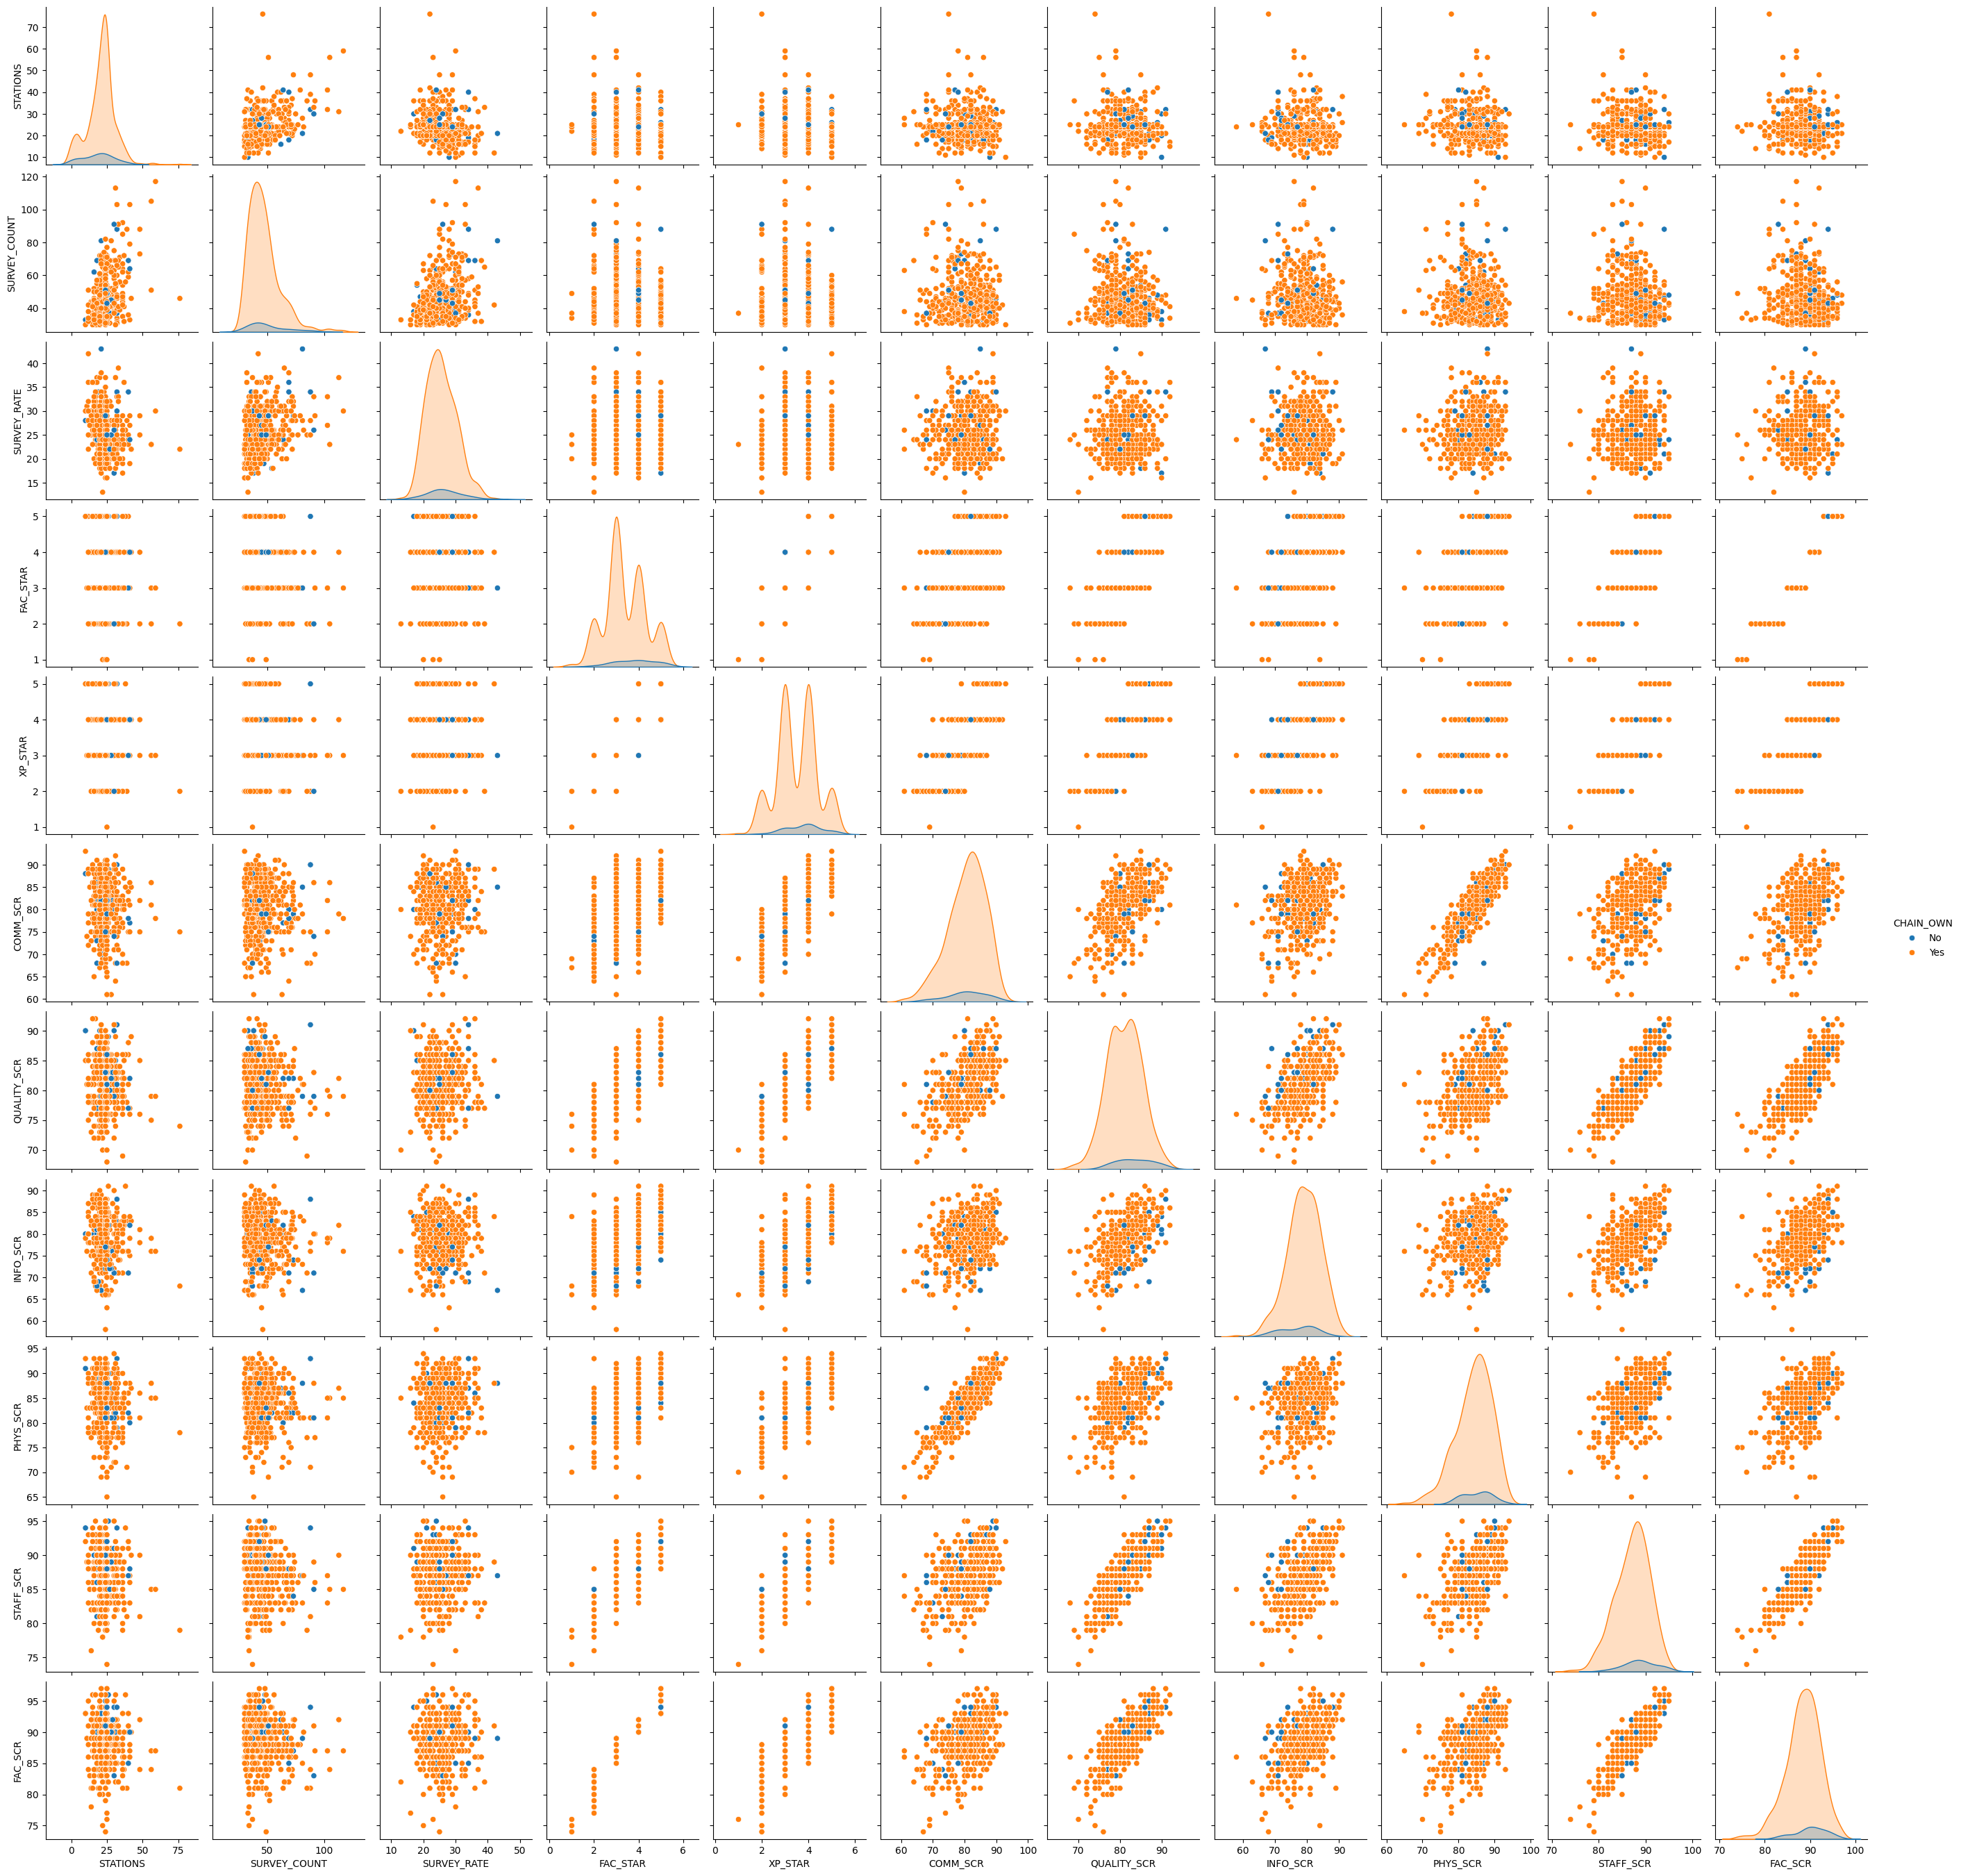

In [14]:
# Plot distributions for selected columns by chain ownership
import seaborn as sns

columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']
# Create the pairplot with the filtered columns
sns.pairplot(data=df_fasc, vars = columns, hue='CHAIN_OWN')


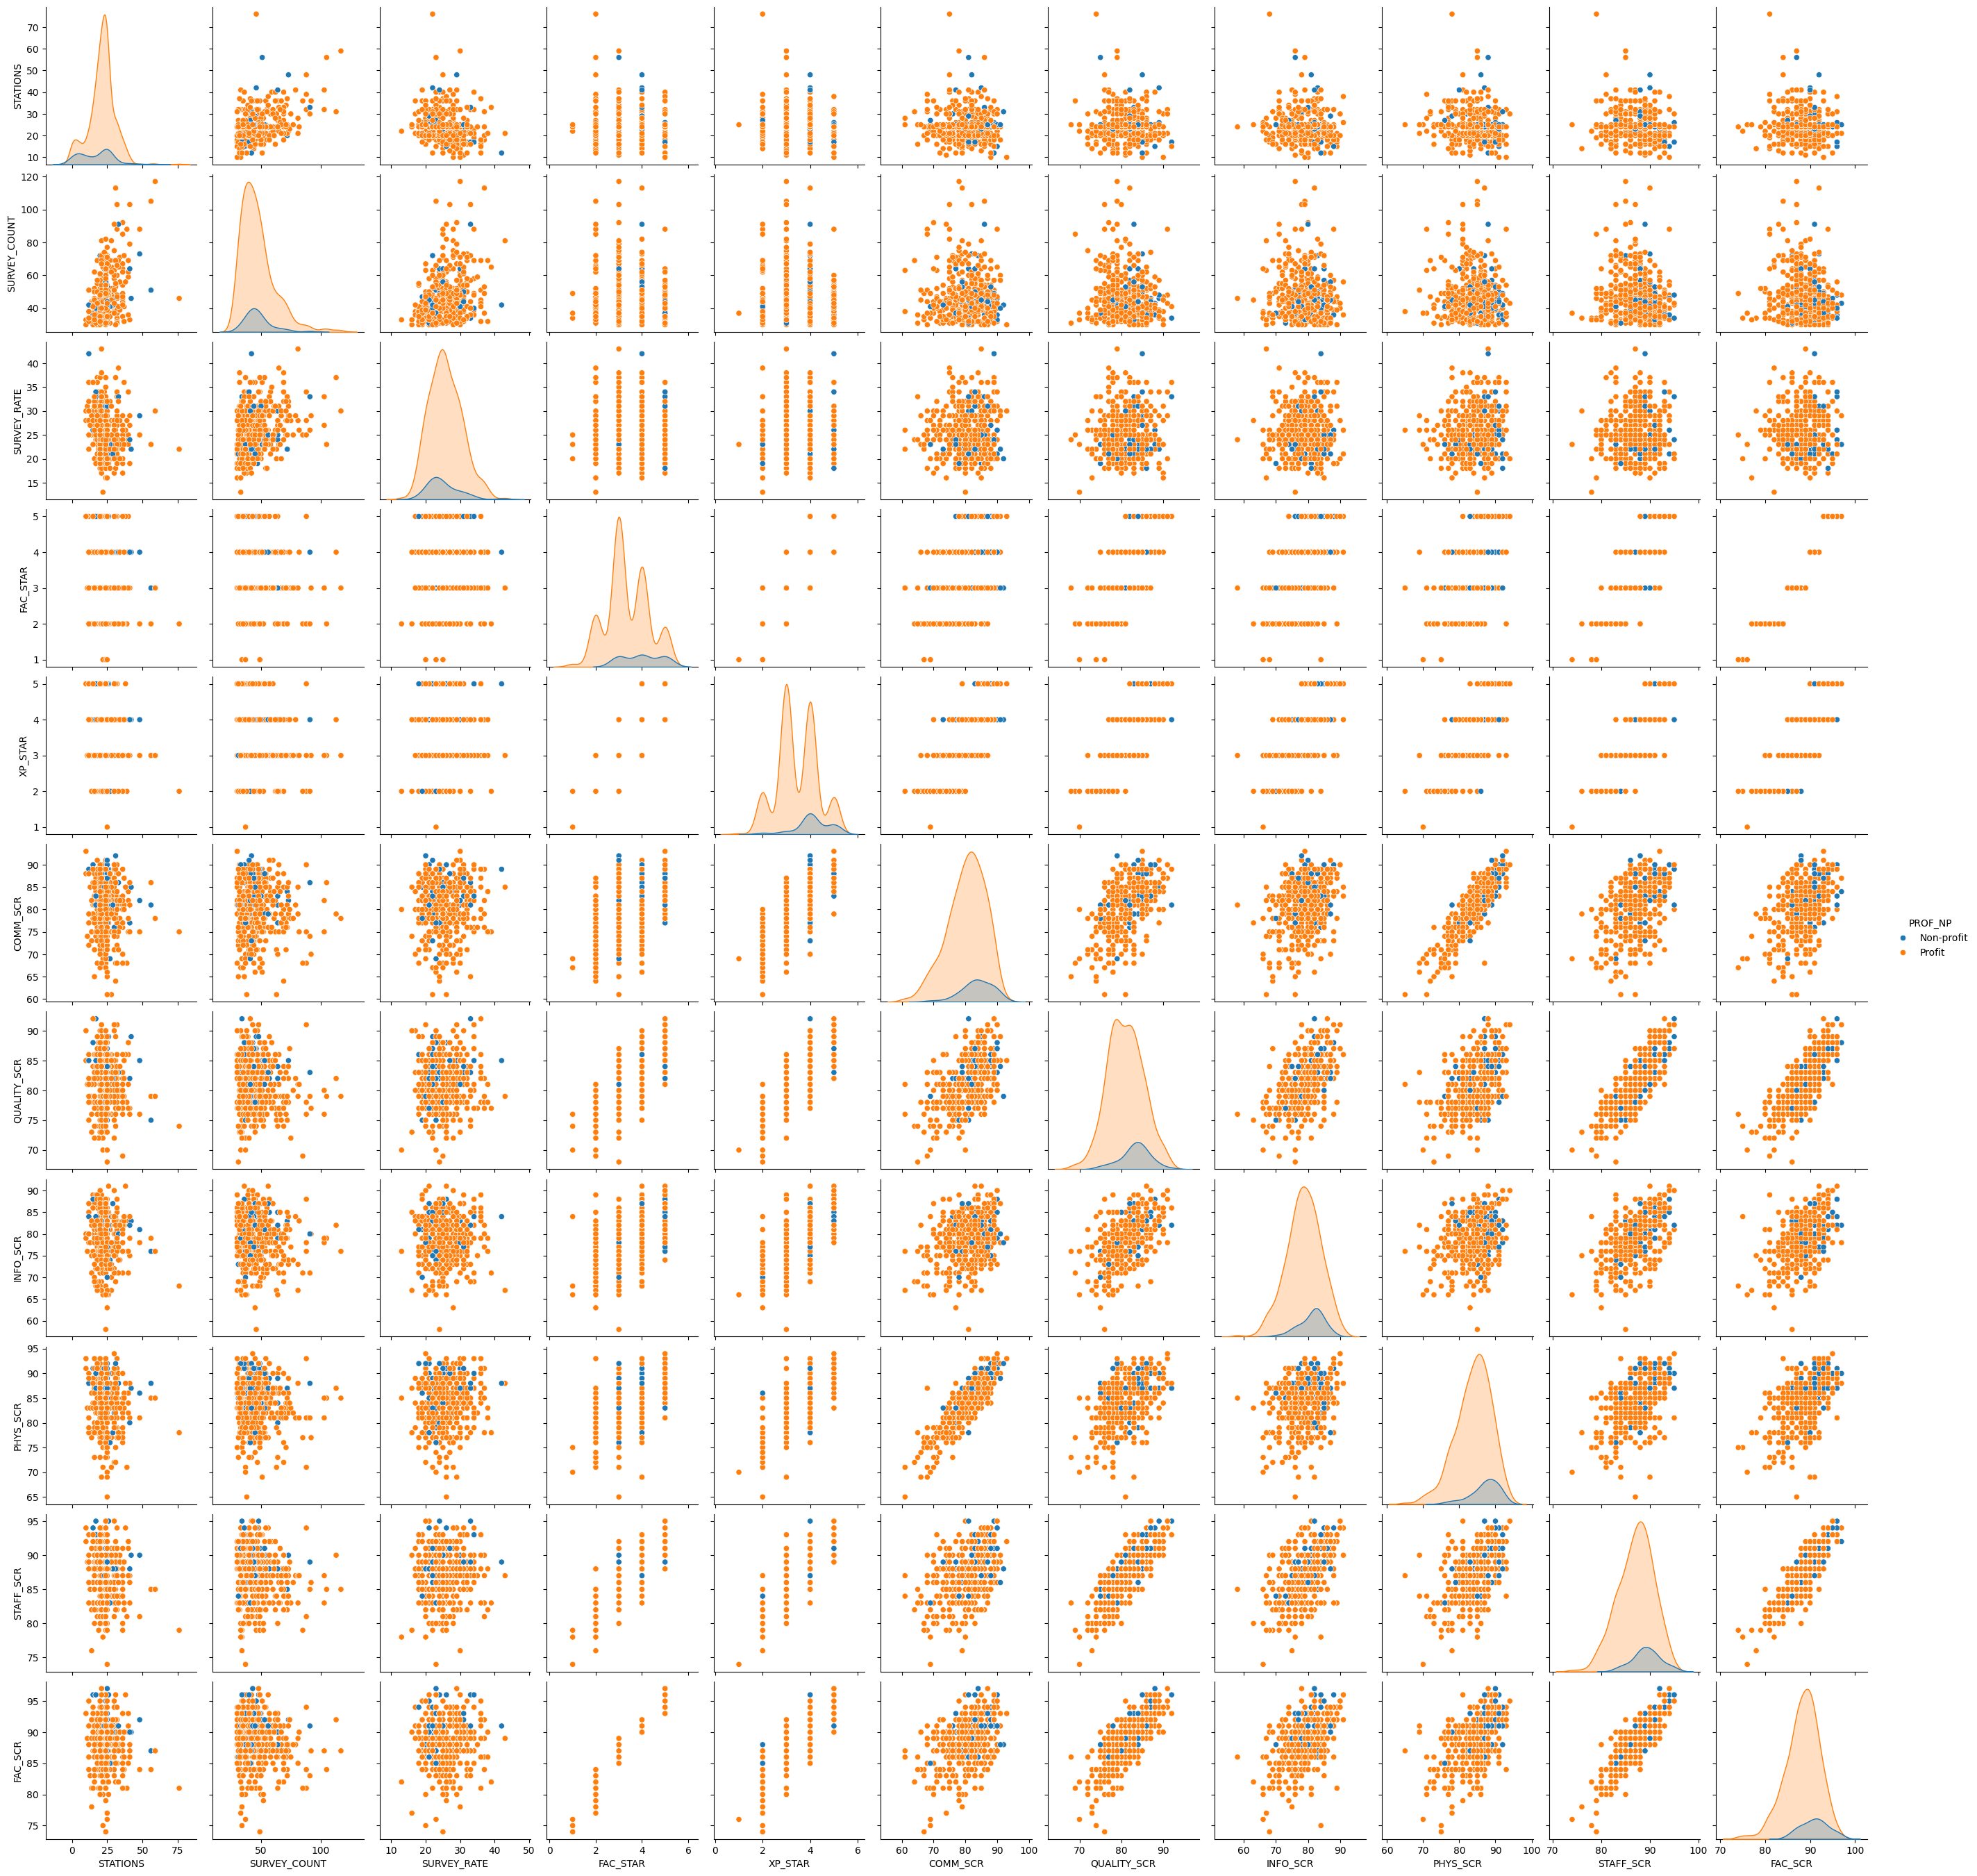

In [13]:
# Further visualizations for selected columns by profit or non-profit:
columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']
sns.pairplot(data=df_fasc, vars = columns, hue='PROF_NP')


## 6. Data Aggregation
This section performs aggregation on the dataset, grouping by specific columns.

In [35]:
# Aggregate data by county
# aggregate by county
agg_funcs = {'CCN' : 'count',
             'STATIONS': 'sum',
             'PROF_NP': 'mean',
             'CHAIN_OWN': 'mean',
             'SURVEY_COUNT': 'sum',
             'SURVEY_RATE': 'mean',
             'FAC_STAR': 'mean',
             'XP_STAR': 'mean',
             'COMM_SCR': 'mean',
             'QUALITY_SCR': 'mean',
             'INFO_SCR': 'mean',
             'PHYS_SCR': 'mean',
             'STAFF_SCR': 'mean',
             'FAC_SCR': 'mean'}

agg_col =['COUNTY', 'STATIONS', 'PROF_NP', 'CHAIN_OWN', 'SURVEY_COUNT',
          'SURVEY_RATE', 'FAC_STAR', 'XP_STAR','COMM_SCR', 'QUALITY_SCR',
          'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR','FAC_SCR']

df_agg = df_fasc.copy()
df_agg['PROF_NP'] = df_agg['PROF_NP'].map({'Profit': 1, 'Non-Profit': 0})
df_agg['CHAIN_OWN'] = df_agg['CHAIN_OWN'].map({'Yes': 1, 'No': 0})

df_agg = df_agg.groupby('COUNTY').agg(agg_funcs).reset_index()
df_agg.rename(columns={'CCN': 'FAC_COUNT'}, inplace=True)
df_agg.head()

COUNTY  FAC_COUNT  STATIONS  PROF_NP  CHAIN_OWN  SURVEY_COUNT  \
0       Alameda         31       636      1.0        1.0         586.0   
1         Butte          5        97      1.0        1.0          77.0   
2  Contra Costa         22       408      1.0        1.0         498.0   
3     Del Norte          1         9      1.0        0.0           0.0   
4     El Dorado          1        23      1.0        1.0          48.0   

   SURVEY_RATE  FAC_STAR   XP_STAR   COMM_SCR  QUALITY_SCR   INFO_SCR  \
0    23.769231  3.307692  3.076923  77.846154    80.384615  76.769231   
1    27.000000  4.000000  4.000000  83.500000    83.000000  86.500000   
2    27.333333  2.833333  3.083333  80.250000    79.500000  77.000000   
3          NaN       NaN       NaN        NaN          NaN        NaN   
4    34.000000  3.000000  4.000000  76.000000    80.000000  85.000000   

    PHYS_SCR  STAFF_SCR    FAC_SCR  
0  82.230769  87.076923  88.076923  
1  86.500000  90.000000  91.500000  
2  82.750000  83.750000  85.333333  
3        NaN        NaN        NaN  
4  79.000000  88.000000  89.000000

In [22]:
# Display aggregated dataset information
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTY        45 non-null     object 
 1   FAC_COUNT     45 non-null     int64  
 2   STATIONS      45 non-null     int64  
 3   PROF_NP       41 non-null     float64
 4   CHAIN_OWN     45 non-null     float64
 5   SURVEY_COUNT  45 non-null     float64
 6   SURVEY_RATE   39 non-null     float64
 7   FAC_STAR      39 non-null     float64
 8   XP_STAR       39 non-null     float64
 9   COMM_SCR      39 non-null     float64
 10  QUALITY_SCR   39 non-null     float64
 11  INFO_SCR      39 non-null     float64
 12  PHYS_SCR      39 non-null     float64
 13  STAFF_SCR     39 non-null     float64
 14  FAC_SCR       39 non-null     float64
dtypes: float64(12), int64(2), object(1)
memory usage: 5.4+ KB


In [43]:
import plotly.express as px
df_agg_treemap = df_agg

fig = px.treemap(df_agg_treemap, path=['COUNTY'], values='STATIONS',
                  color='FAC_STAR', hover_data=df_agg.columns,
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_agg_treemap['FAC_STAR'], weights=df_agg_treemap['STATIONS']))
fig.show()

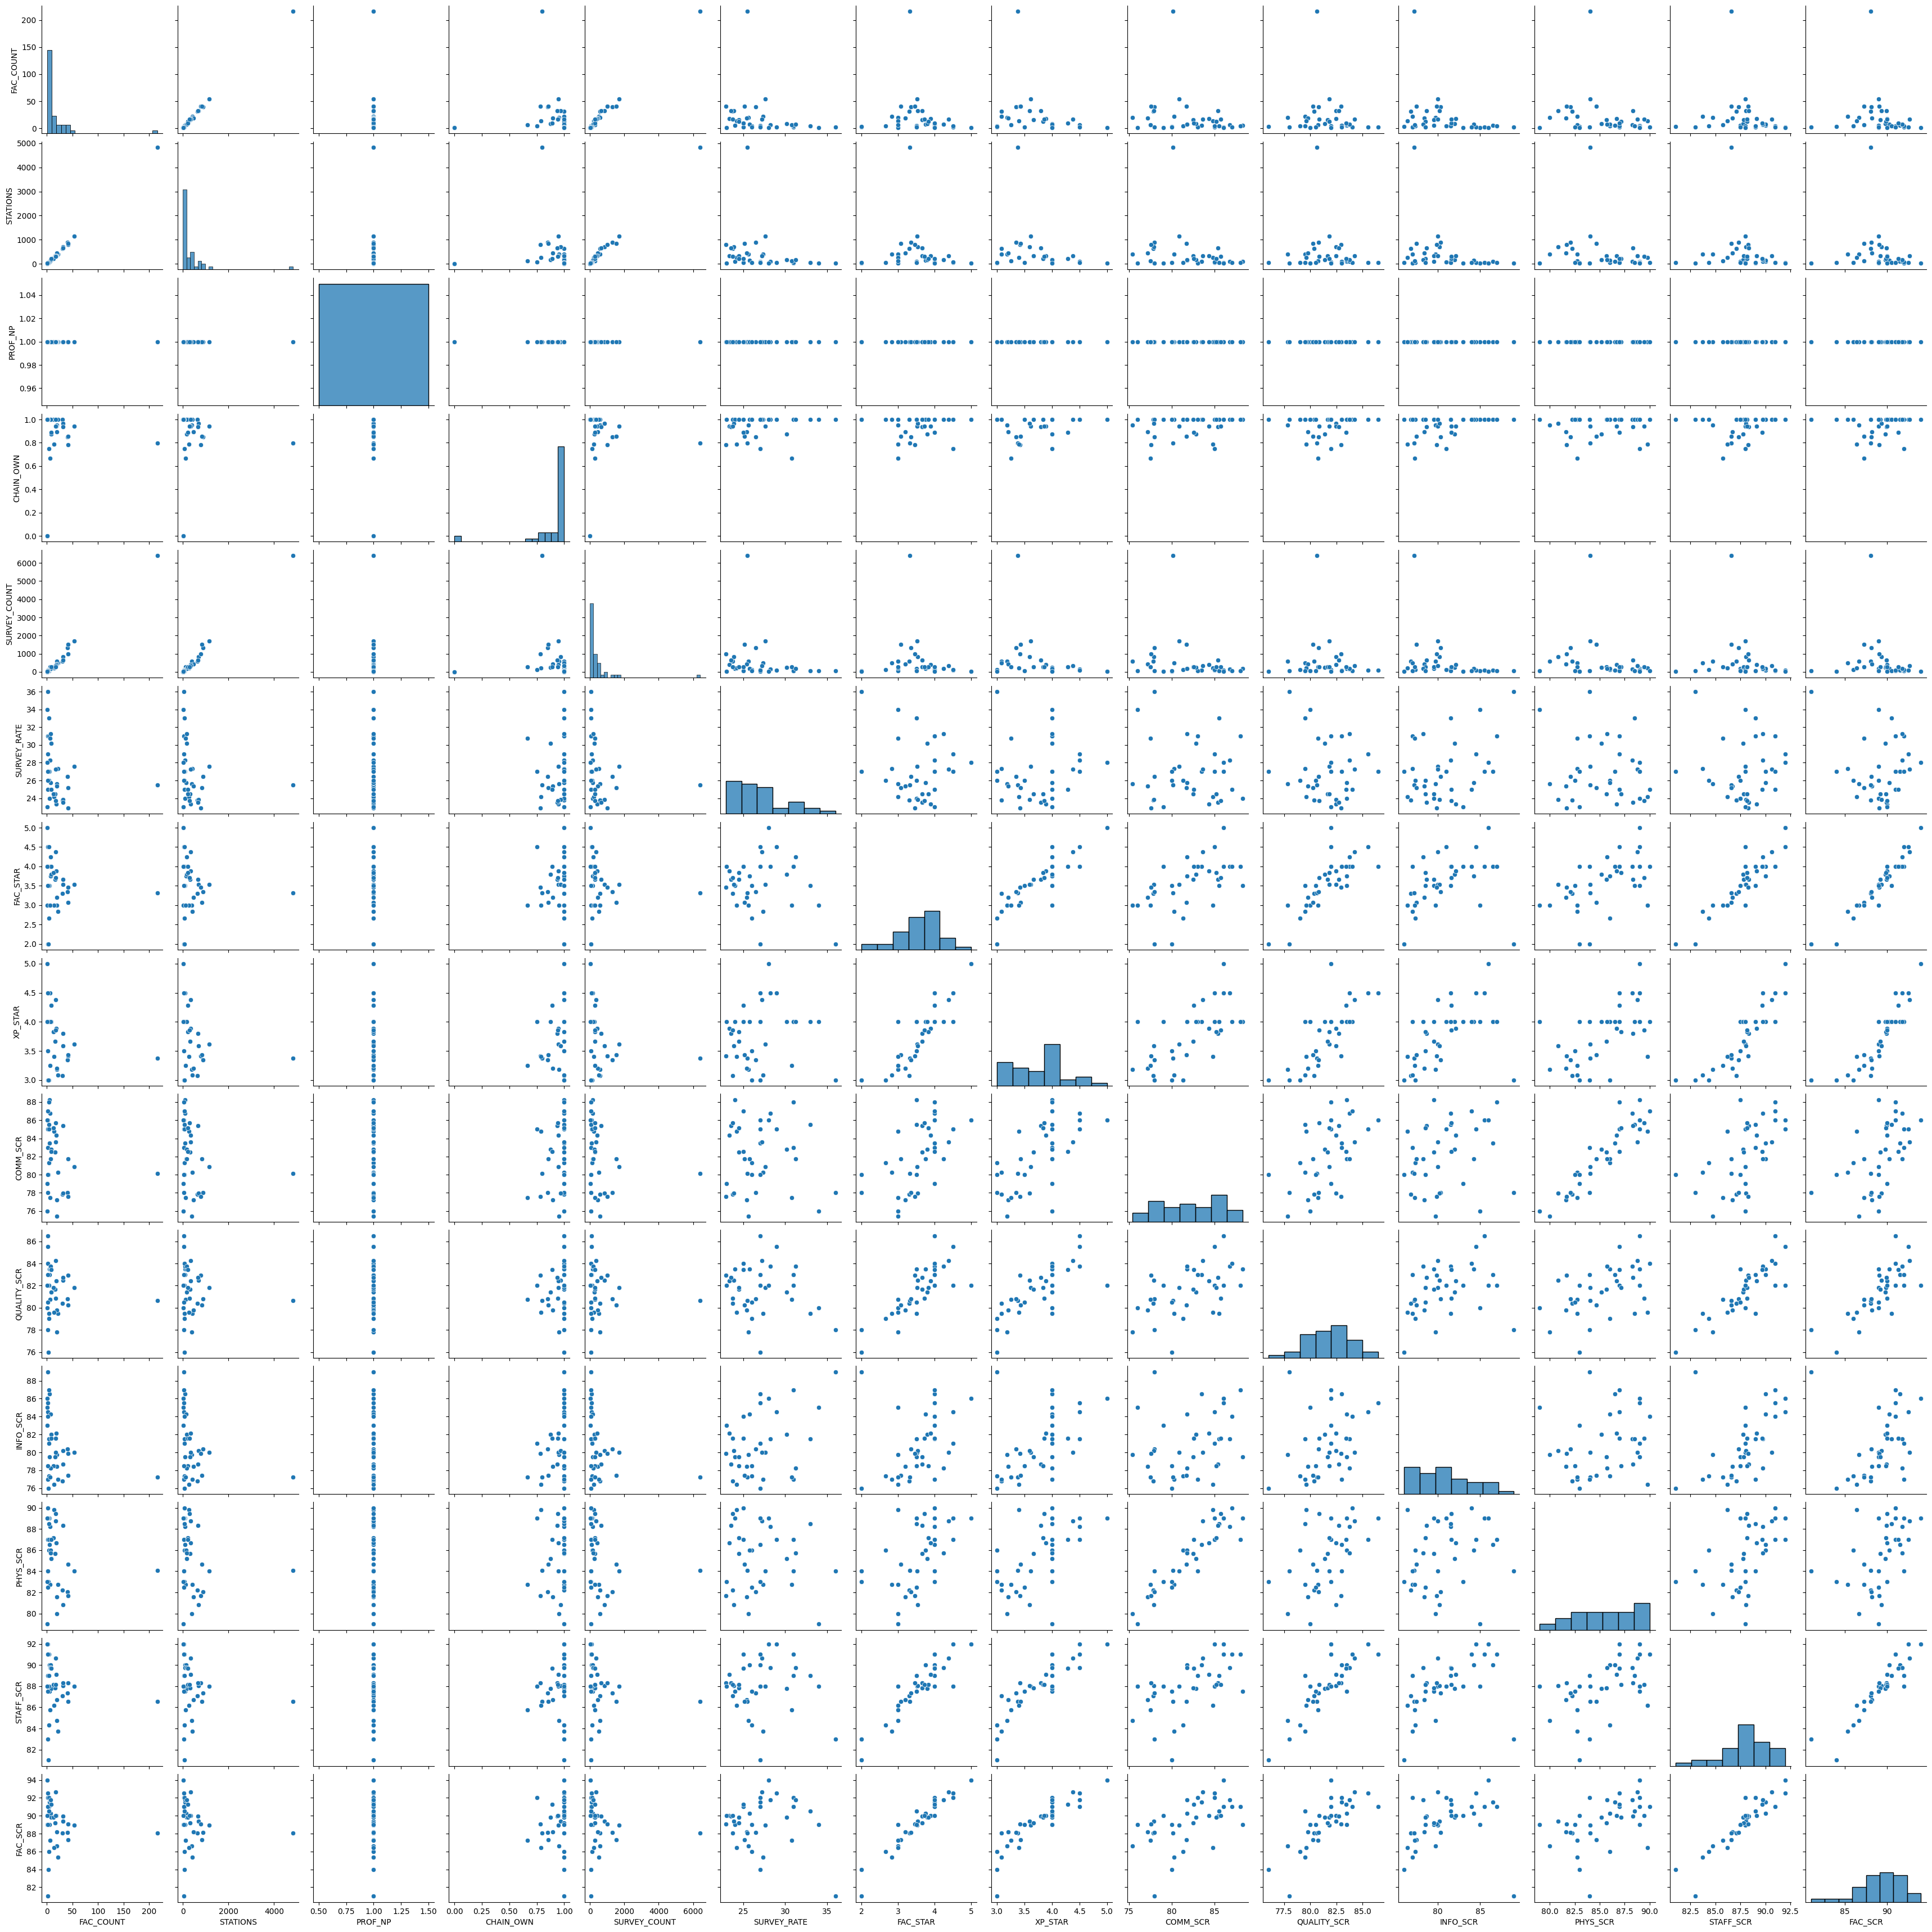

In [17]:
# Pairplot for aggregated data

sns.pairplot(data=df_agg)

In [ ]:
import pandas as pd
import scripts as func


# III. Medicare Dataset

## 1. DATA Descritpion

## 2. Load Datasets
This section loads raw data from various CSV files.

### 2.1 Load Medicare Data:

In [109]:
# Load DFC Facility Data
path_medicare = "DATA\MEDICARE\Medicare.csv"
df_medicare_raw = pd.read_csv(path_medicare, low_memory=False)
df_medicare_raw_COUNTY = df_medicare_raw[df_medicare_raw['BENE_GEO_LVL'] == 'County']
df_medicare_raw_CA = df_medicare_raw_COUNTY[df_medicare_raw_COUNTY['BENE_GEO_DESC'].str.startswith('CA-')]
df_medicare_raw_CA['COUNTY'] = df_medicare_raw_CA['BENE_GEO_DESC'].str.split('-').str[1]
df_medicare = df_medicare_raw_CA.copy()

def medicare_filter(df, year_range, columns):
    years = range(year_range[0], year_range[1]+1)
    df = df[df['YEAR'].isin(years)]
    df = df[columns]
    return df

year_range = (2014, 2022)
columns = [
    'YEAR',
    'COUNTY',
    'OP_DLYS_MDCR_PYMT_AMT',
    'OP_DLYS_MDCR_PYMT_PCT',
    'OP_DLYS_MDCR_PYMT_PC',
    'OP_DLYS_MDCR_PYMT_PER_USER',
    'OP_DLYS_MDCR_STDZD_PYMT_AMT',
    'OP_DLYS_MDCR_STDZD_PYMT_PCT',
    'OP_DLYS_MDCR_STDZD_PYMT_PC',
    'OP_DLYS_MDCR_STDZD_PYMT_PER_USER',
    'BENES_OP_DLYS_CNT',
    'BENES_OP_DLYS_PCT',
    'OP_DLYS_VISITS_PER_1000_BENES'
]


df_dial = medicare_filter(df_medicare, year_range, columns)

df_dial.head()

C:\Users\kasra\AppData\Local\Temp\ipykernel_36496\1314237641.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



YEAR     COUNTY OP_DLYS_MDCR_PYMT_AMT OP_DLYS_MDCR_PYMT_PCT  \
208  2014    Alameda           44860311.11                0.0423   
209  2014     Alpine                     *                     *   
210  2014     Amador             518681.43                0.0077   
211  2014      Butte            6445460.83                0.0156   
212  2014  Calaveras            1262893.08                 0.015   

    OP_DLYS_MDCR_PYMT_PC OP_DLYS_MDCR_PYMT_PER_USER  \
208               473.67                   32366.75   
209                    *                          *   
210                68.88                   25934.07   
211               147.62                      24601   
212               129.41                   28702.12   

    OP_DLYS_MDCR_STDZD_PYMT_AMT OP_DLYS_MDCR_STDZD_PYMT_PCT  \
208                 34809758.15                       0.046   
209                           *                           *   
210                   438715.28                      0.0084   
211                  6033808.96                      0.0172   
212                  1111710.59                      0.0176   

    OP_DLYS_MDCR_STDZD_PYMT_PC OP_DLYS_MDCR_STDZD_PYMT_PER_USER  \
208                     367.55                         25115.27   
209                          *                                *   
210                      58.26                         21935.76   
211                     138.19                         23029.81   
212                     113.92                         25266.15   

    BENES_OP_DLYS_CNT BENES_OP_DLYS_PCT OP_DLYS_VISITS_PER_1000_BENES  
208              1386            0.0146                     2090.8909  
209                 *                 *                             *  
210                20            0.0027                      437.8486  
211               262             0.006                      786.7302  
212                44            0.0045                      737.1657

## 2. Basic Data Exploration
This section provides a brief overview of the Medicare dataset, including data types, summary statistics, and missing values.

In [110]:
df_dial.replace('*', np.nan, inplace=True)
df_dial['COUNTY'].replace('UNKNOWN', np.nan, inplace=True)
# Display dataset information
column_name_mapping = {
    'YEAR': 'YEAR',
    'COUNTY': 'COUNTY',
    'OP_DLYS_MDCR_PYMT_AMT': 'PYMT_AMT',
    'OP_DLYS_MDCR_PYMT_PCT': 'PYMT_PCT',
    'OP_DLYS_MDCR_PYMT_PC': 'PYMT_PC',
    'OP_DLYS_MDCR_PYMT_PER_USER': 'PYMT_PER_USER',
    'OP_DLYS_MDCR_STDZD_PYMT_AMT': 'STDZ_PYMT_AMT',
    'OP_DLYS_MDCR_STDZD_PYMT_PCT': 'STDZ_PYMT_PCT',
    'OP_DLYS_MDCR_STDZD_PYMT_PC': 'STDZ_PYMT_PC',
    'OP_DLYS_MDCR_STDZD_PYMT_PER_USER': 'STDZ_PYMT_PER_USER',
    'BENES_OP_DLYS_CNT': 'USER_CNT',
    'BENES_OP_DLYS_PCT': 'USER_PCT',
    'OP_DLYS_VISITS_PER_1000_BENES': 'VISITS_PER_1000'
}

column_description_mapping = {
    'YEAR': 'Year of the Medicare data',
    'COUNTY': 'Geographical region (County)',
    'PYMT_AMT': 'Total Medicare Payment Amount for Outpatient Dialysis',
    'PYMT_PCT': 'Medicare Payment as Percentage of Total Payment for Outpatient Dialysis',
    'PYMT_PC': 'Per Capita Medicare Payment for Outpatient Dialysis',
    'PYMT_PER_USER': 'Medicare Payment per User for Outpatient Dialysis',
    'STDZ_PYMT_AMT': 'Standardized Medicare Payment Amount for Outpatient Dialysis',
    'STDZ_PYMT_PCT': 'Standardized Payment as Percentage of Total Payment for Outpatient Dialysis',
    'STDZ_PYMT_PC': 'Per Capita Standardized Medicare Payment for Outpatient Dialysis',
    'STDZ_PYMT_PER_USER': 'Standardized Payment per User for Outpatient Dialysis',
    'USER_CNT': 'Number of Users of Outpatient Dialysis Services',
    'USER_PCT': 'Percentage of Beneficiaries Using Outpatient Dialysis',
    'VISITS_PER_1000': 'Outpatient Dialysis Visits per 1,000 Beneficiaries'
}
df_dial.rename(columns=column_name_mapping, inplace=True)


# Convert specified columns to int and str, handling NaN values
df_dial['YEAR'] = pd.to_numeric(df_dial['YEAR'], errors='coerce').fillna(0).astype(int)
df_dial['COUNTY'] = df_dial['COUNTY'].astype(str)
df_dial['USER_CNT'] = pd.to_numeric(df_dial['USER_CNT'], errors='coerce').fillna(0).astype(int)

# Convert all other columns to float, ignoring NaN values
float_columns = [col for col in df_dial.columns if col not in ['YEAR', 'COUNTY', 'USER_CNT']]
df_dial[float_columns] = df_dial[float_columns].apply(pd.to_numeric, errors='coerce')

df_dial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 208 to 27174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                531 non-null    int32  
 1   COUNTY              531 non-null    object 
 2   PYMT_AMT            479 non-null    float64
 3   PYMT_PCT            479 non-null    float64
 4   PYMT_PC             479 non-null    float64
 5   PYMT_PER_USER       479 non-null    float64
 6   STDZ_PYMT_AMT       479 non-null    float64
 7   STDZ_PYMT_PCT       479 non-null    float64
 8   STDZ_PYMT_PC        479 non-null    float64
 9   STDZ_PYMT_PER_USER  479 non-null    float64
 10  USER_CNT            531 non-null    int32  
 11  USER_PCT            479 non-null    float64
 12  VISITS_PER_1000     479 non-null    float64
dtypes: float64(10), int32(2), object(1)
memory usage: 53.9+ KB


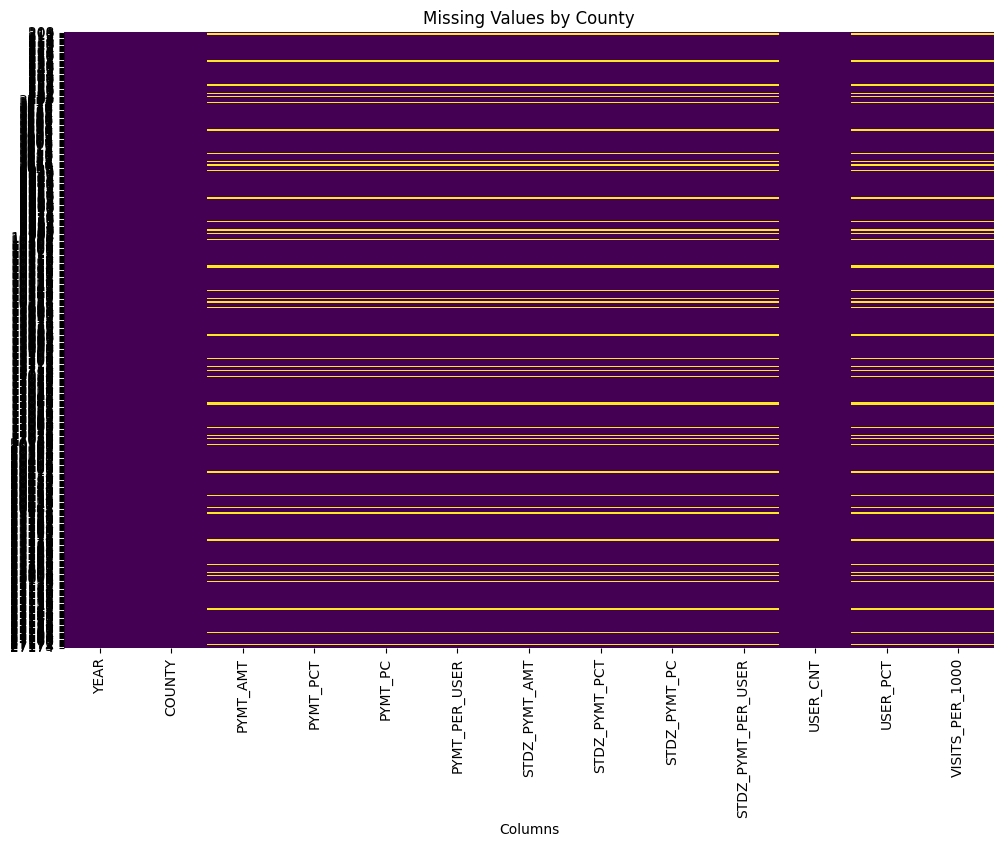

In [113]:
# Create a mask of missing values, grouping by COUNTY
missing_data = df_dial.isnull()

# Plot the heatmap with COUNTY on the y-axis
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=True)
plt.title('Missing Values by County')
plt.xlabel('Columns')
plt.show()

In [115]:
# Aggregate by 'COUNTY' and compute the mean of all other numerical columns, excluding 'YEAR'
df_dial_agg = df_dial.groupby('COUNTY').mean(numeric_only=True).reset_index()

# Drop the 'YEAR' column as it is no longer needed
df_dial_agg = df_dial_agg.drop(columns=['YEAR'])

# Display the first few rows of the aggregated dataframe
df_dial_agg.head()

COUNTY      PYMT_AMT  PYMT_PCT     PYMT_PC  PYMT_PER_USER  \
0    Alameda  4.936508e+07  0.039133  491.670000   35489.572222   
1     Alpine           NaN       NaN         NaN            NaN   
2     Amador  7.170296e+05  0.008789   90.120000   27873.103333   
3      Butte  6.965949e+06  0.014944  164.761111   25305.245556   
4  Calaveras  1.313729e+06  0.012411  122.510000   28538.923333   

   STDZ_PYMT_AMT  STDZ_PYMT_PCT  STDZ_PYMT_PC  STDZ_PYMT_PER_USER  \
0   3.612771e+07       0.041000    359.784444        25936.892222   
1            NaN            NaN           NaN                 NaN   
2   5.645674e+05       0.009211     71.012222        22052.695556   
3   6.421417e+06       0.016378    151.806667        23320.308889   
4   1.102734e+06       0.013789    102.998889        23915.678889   

      USER_CNT  USER_PCT  VISITS_PER_1000  
0  1392.222222  0.013867      1964.337089  
1     0.000000       NaN              NaN  
2    25.777778  0.003244       491.672767  
3   276.666667  0.006511       813.215167  
4    46.222222  0.004300       642.379678

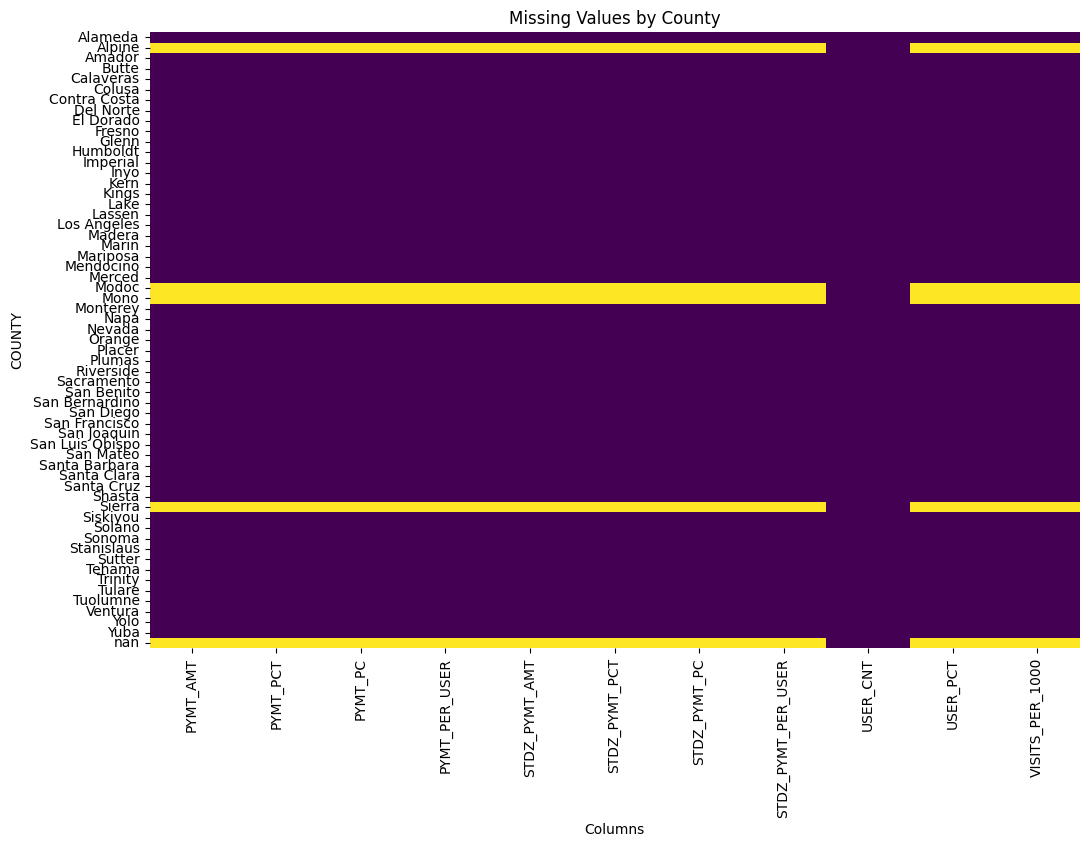

In [117]:
# Create a mask of missing values, grouping by COUNTY
missing_data = df_dial_agg.set_index('COUNTY').isnull()

# Plot the heatmap with COUNTY on the y-axis
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=True)
plt.title('Missing Values by County')
plt.xlabel('Columns')
plt.show()

## 5. Data Visualization
This section includes visualizations to explore data distributions and relationships between variables.

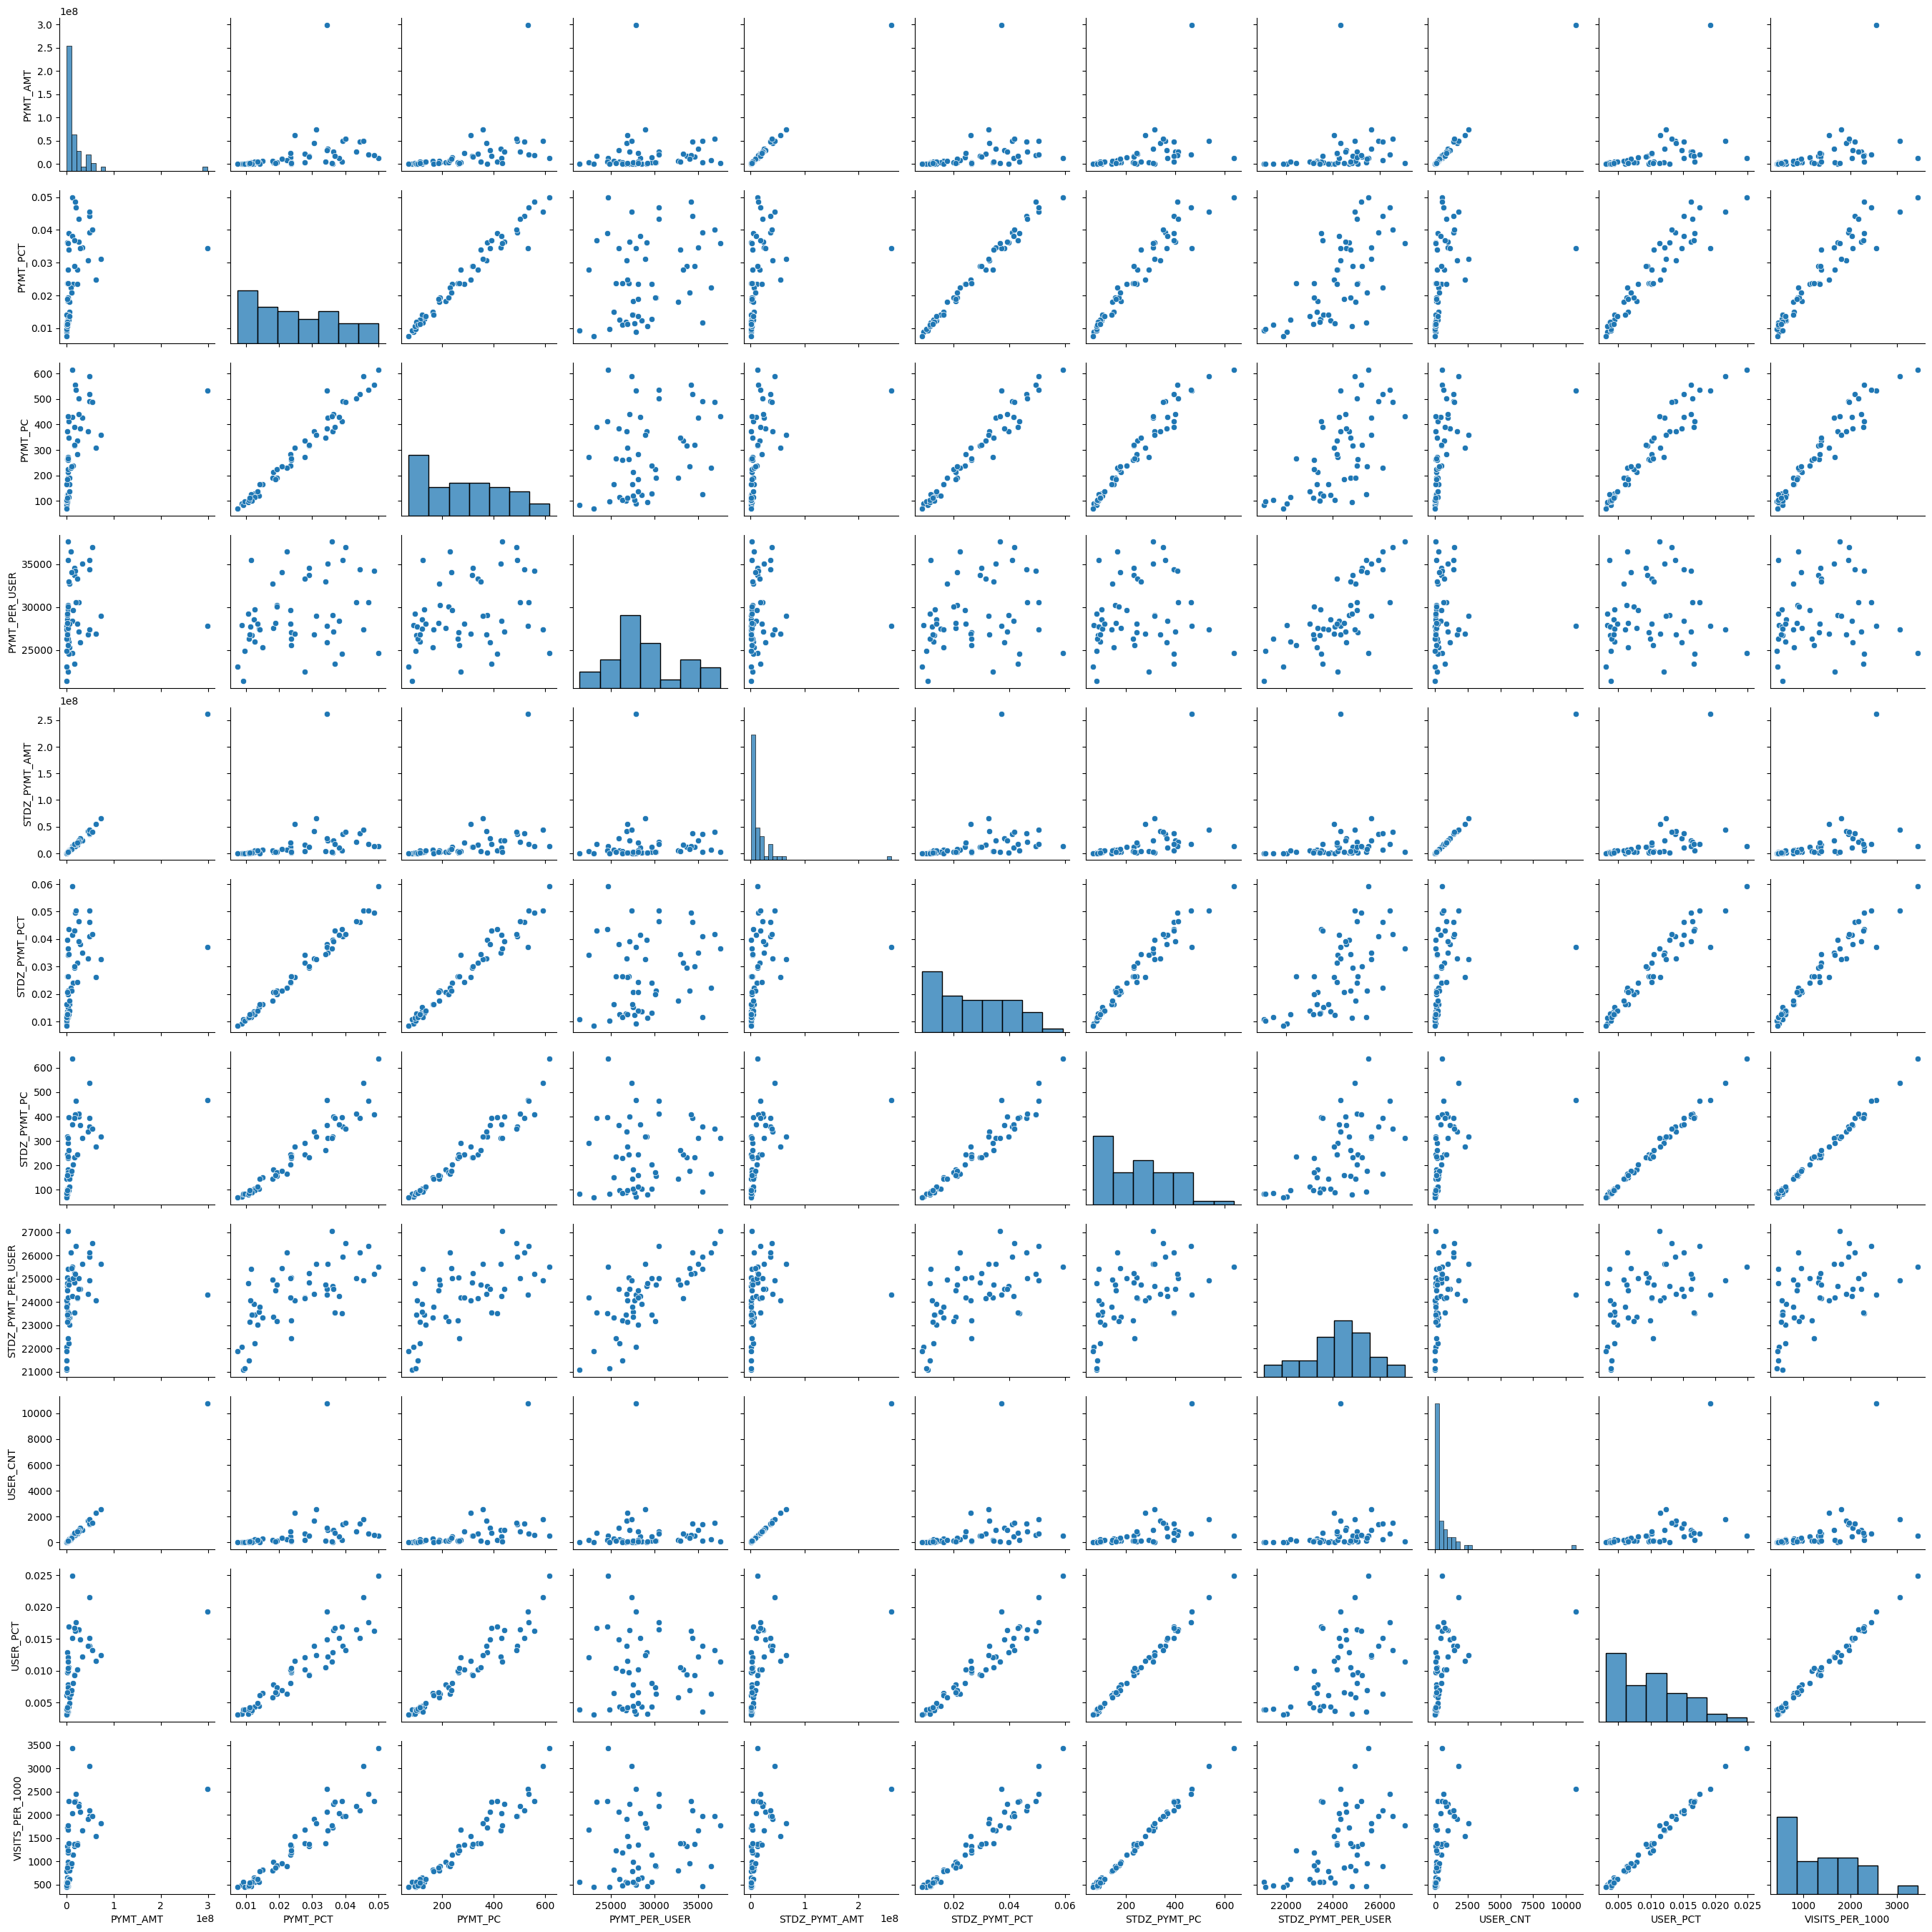

In [118]:
# Plot distributions for selected columns
import seaborn as sns

sns.pairplot(data=df_dial_agg)


In [126]:
df_agg_treemap = df_dial_agg.dropna()
df_agg_treemap.drop(df_agg_treemap[df_agg_treemap['USER_CNT'] == 0].index, inplace=True)

fig = px.treemap(df_agg_treemap, path=['COUNTY'], values='USER_CNT',
                  color='STDZ_PYMT_PC', hover_data=df_dial_agg.columns,
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_agg_treemap['STDZ_PYMT_PC'], weights=df_agg_treemap['USER_CNT']))
fig.show()

C:\Users\kasra\AppData\Local\Temp\ipykernel_36496\523167802.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

